In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
for i in df.loc[pd.isna(df["Year"])].index:
    df['Year'].iloc[i] = int(df.groupby(df['Platform']).mean().loc[df['Platform'].iloc[i]].Year)

/home/prince/envs/pytorch/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


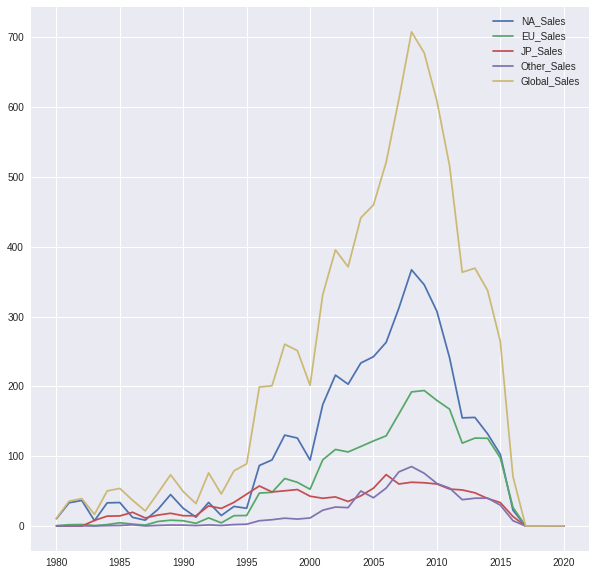

In [5]:
sales_group = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

by_year = df.groupby(df['Year']).sum()

plt.figure(figsize = (10,10))
for sale in sales_group:
    plt.plot(by_year.index, by_year[sale], label = sale)
plt.legend()
plt.show()

The sale of Video Games started rapidly growing since 1995.

We take a look at the distribution of games via genre.

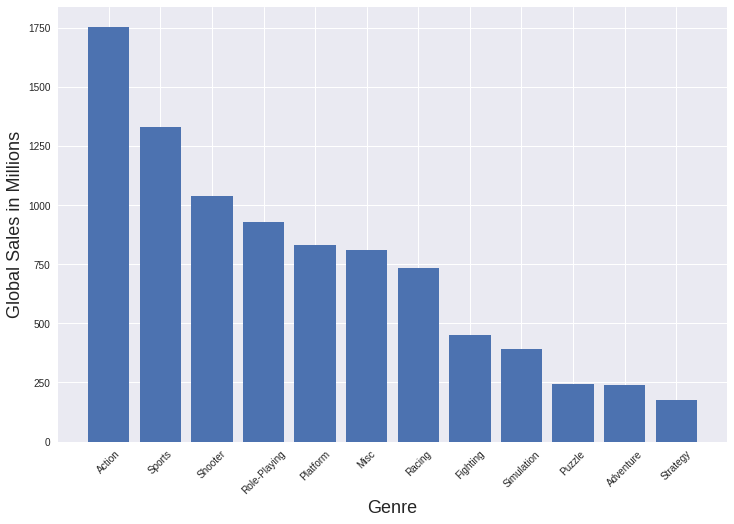

In [6]:
by_genre = df.groupby(df['Genre']).sum().sort_values(by = ['Global_Sales'], ascending = False)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 45)
plt.bar(by_genre.index, by_genre['Global_Sales'])
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Global Sales in Millions', fontsize=18)
plt.show()

We also take a look at the distribution of games based on the platform.

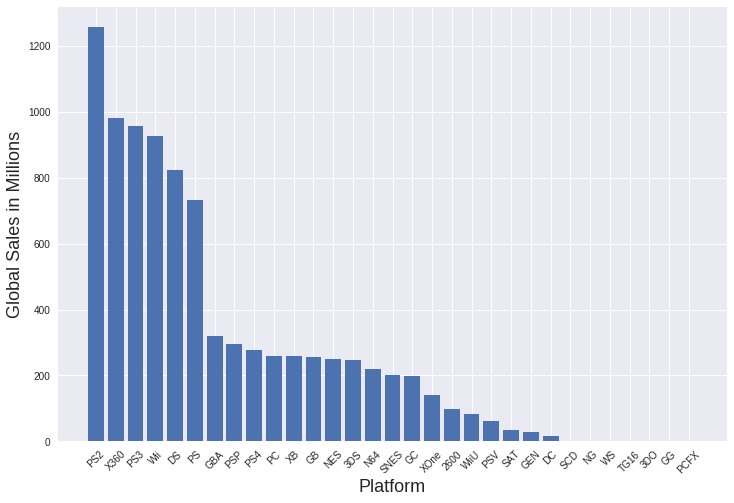

In [7]:
by_plat = df.groupby(df['Platform']).sum().sort_values(by = ['Global_Sales'], ascending = False)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 45)
plt.bar(by_plat.index, by_plat['Global_Sales'])
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Global Sales in Millions', fontsize=18)
plt.show()

## Platform Transition

Every now and then, certain platforms upgrade to a newer version such as a PS2 to a PS3 or an XBOX to an XBOX360. We'll analyze how video game sales are affected by this platform transition and what games are still marketable during this transition phase.

We first define a function that'll let us view the 'Global Sales' of each platform per year.

In [8]:
def plotGlobalSales(platforms):
    plt.figure(figsize = (10,5))
    for platform in platforms:
        sub_df = df.loc[df['Platform'] == platform].groupby(df['Year']).sum()
        plt.plot(sub_df.index, sub_df['Global_Sales'], label = platform)
    plt.ylabel("Global Sales in Millions", fontsize = 18)
    plt.xticks([i for i in range(2000, 2018, 1)])
    plt.xlabel("Year", fontsize = 18)
    plt.legend()
    plt.show()

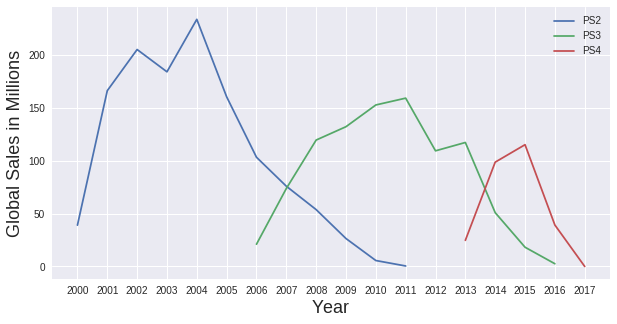

In [9]:
plotGlobalSales(['PS2','PS3','PS4'])

For the PS2, PS3, and PS4, there are clear overlaps on video game sales. We will look into what games are still bought after a newer version is released.

For the transition between PS2 and PS3, we'll take a look at the 2006 - 2011 time period.

In [10]:
curr_df = df[(df['Platform'] == 'PS2') & (df['Year'] >= 2006) & (df['Year'] <= 2011)].sort_values('Year')
curr_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
15607,15610,Sega Ages 2500 Series Vol. 26: Dynamite Deka,PS2,2006.0,Action,Sega,0.00,0.00,0.02,0.00,0.02
9586,9588,Torino 2006,PS2,2006.0,Sports,Take-Two Interactive,0.06,0.05,0.00,0.02,0.13
5148,5150,Xenosaga Episode III: Also sprach Zarathustra,PS2,2006.0,Role-Playing,Namco Bandai Games,0.09,0.07,0.18,0.02,0.37
5143,5145,FIFA Street 2,PS2,2006.0,Sports,Electronic Arts,0.17,0.13,0.02,0.04,0.37


In [11]:
curr_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11224,11226,FIFA 12,PS2,2011.0,Sports,Electronic Arts,0.00,0.02,0.00,0.06,0.09
10139,10141,WWE All Stars,PS2,2011.0,Fighting,THQ,0.05,0.04,0.00,0.01,0.11
9394,9396,MLB 11: The Show,PS2,2011.0,Sports,Sony Computer Entertainment,0.06,0.05,0.00,0.02,0.13
15293,15296,Moujuutsukai to Oujisama: Snow Bride,PS2,2011.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
13199,13201,Major League Baseball 2K11,PS2,2011.0,Sports,Take-Two Interactive,0.02,0.02,0.00,0.01,0.05


We take a look if there is a pattern in the kind of genre that is in the overlap.

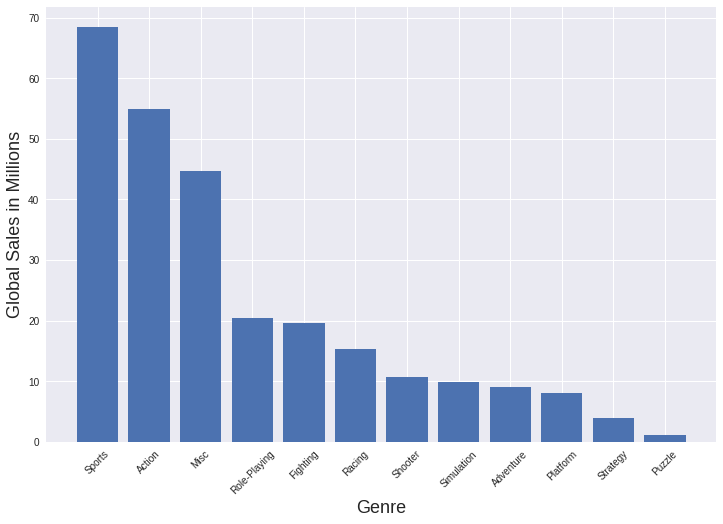

In [12]:
curr_genre = curr_df.groupby(df['Genre']).sum().sort_values(by = ['Global_Sales'], ascending = False)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 45)
plt.bar(curr_genre.index, curr_genre['Global_Sales'])
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Global Sales in Millions', fontsize=18)

plt.show()

From initial inspection, there doesn't appear to be a predominant genre that causes this overlap.

We can take a look if this transition is market dependent.

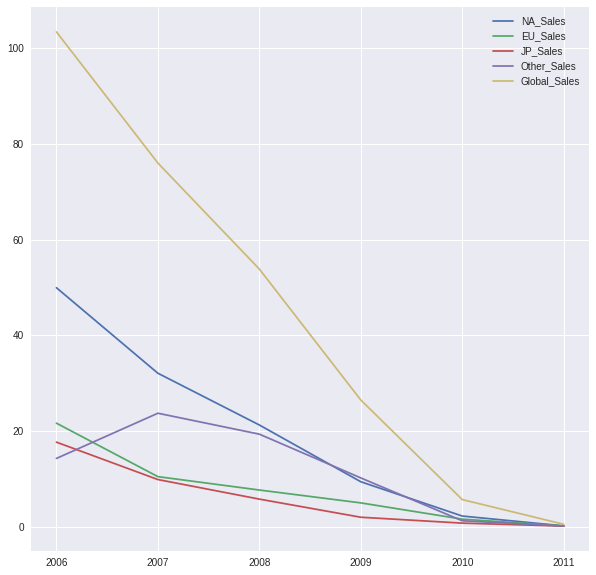

In [13]:
curr_year = curr_df.groupby(df['Year']).sum()

plt.figure(figsize = (10,10))
for sale in sales_group:
    plt.plot(curr_year.index, curr_year[sale], label = sale)
plt.legend()
plt.show()

The sales trend do show a particular decline except for Other Sales which covers sales that are outside JP, EU or NA.

We can further view what kind of video games were popular in the PS2 even after the release of the PS3 in other regions.

In [14]:
curr_df.groupby(df['Name']).sum().sort_values(by = 'Other_Sales', ascending = False).head(5)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,
Pro Evolution Soccer 2008,349,2007.0,0.05,0.00,0.64,2.93,3.63
FIFA Soccer 08,441,2007.0,0.68,0.00,0.00,2.46,3.14
PES 2009: Pro Evolution Soccer,615,2008.0,0.13,0.07,0.26,2.05,2.50
FIFA Soccer 09,703,2008.0,0.38,0.07,0.01,1.82,2.28
Final Fantasy XII,148,2006.0,1.88,0.00,2.33,1.74,5.95


An interesting trend that you can see here is that the most popular games in the PS2 after the release of the PS3 were **SOCCER** games. The Top 4 games that had the most sales were all soccer games.

If we look at the percentage of the Other Sales, soccer games contribute to 20% of the total Other Sales of PS2 games between 2006 and 2011.

In [15]:
curr_df['Soccer'] = [1 if 'soccer' in a.lower() else 0 for a in curr_df['Name']]
socc_df = curr_df.groupby(curr_df['Soccer']).sum()

socc_df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Soccer
Soccer,,,,,,,,
0,7596762,1585781.0,112.36,40.35,33.06,54.83,240.6,0
1,59973,30120.0,2.53,5.93,2.87,13.87,25.2,15


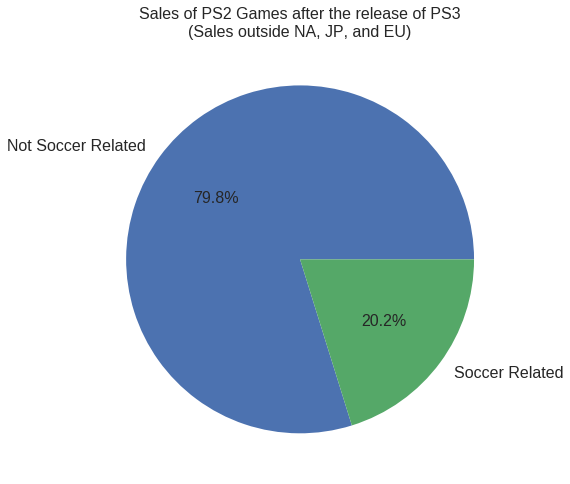

In [16]:
plt.figure(figsize = (12,8))
plt.pie(socc_df['Other_Sales'], labels = ["Not Soccer Related", "Soccer Related"], 
         autopct='%1.1f%%', textprops={'fontsize': 16})
plt.title("Sales of PS2 Games after the release of PS3\n(Sales outside NA, JP, and EU)", fontsize = 16)
plt.show()

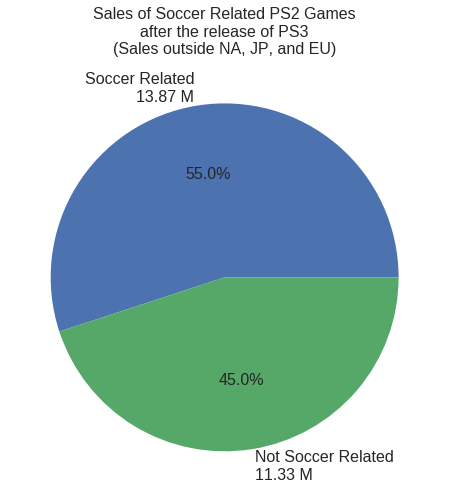

In [17]:
x = [socc_df['Other_Sales'].iloc[1], socc_df['Global_Sales'].iloc[1] - socc_df['Other_Sales'].iloc[1]]
y = [f"Soccer Related\n{socc_df['Other_Sales'].iloc[1]:.2f} M",
     f"Not Soccer Related\n{socc_df['Global_Sales'].iloc[1] - socc_df['Other_Sales'].iloc[1]:.2f} M"]
plt.figure(figsize = (12,8))
plt.pie(x, labels = y,
        autopct='%1.1f%%', textprops={'fontsize': 16})
plt.title("Sales of Soccer Related PS2 Games\nafter the release of PS3\n(Sales outside NA, JP, and EU)", fontsize = 16)
plt.show()

For video game developers, this can be a point of consideration for game publishers to develop soccer games for older platforms targeting countries outside of NA, JP, and EU.